In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pylab as plt
from matplotlib import gridspec


In [2]:
img = cv.resize(cv.imread('../Lab1/image.jpg'), (50, 50))

#Grammar Val
a_val = np.linspace(0.5, 2.0, 20)
b_val = np.linspace(-100, 100, 20)

#Video Var
output_file = "output_file1.mp4"  # Corrected file name
fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 1
frame = 100

out = cv.VideoWriter(output_file, fourcc, fps, (img.shape[1], img.shape[0]))

for a in a_val:
    for b in b_val:
        new_image =  np.zeros_like(img)

        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                for c in range(img.shape[2]):
                    new_val = a*img[x,y,c]+b

                    if new_val > 255:
                        new_val = 255
                    elif new_val < 0:
                        new_val = 0

                    new_image[x,y,c] = new_val

        out.write(new_image)

out.release()


In [3]:
input_image = cv.imread('../PIC/17.png', cv.IMREAD_COLOR)

# Grammar Var
num_images = 20
a_values = np.linspace(0.1, 2, num_images)
b = 0
bit_depth = 8

output_filename = 'output_video5.mp4'
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter(output_filename, fourcc, 1, input_image.shape[:2][::-1])

# Apply gamma adjustments and create the video
for a in a_values:
    gamma_adjusted = (input_image / 255.0) ** a * 255
    gamma_adjusted[gamma_adjusted < 0] = 0
    gamma_adjusted[gamma_adjusted > 255] = 255
    adjusted_image = gamma_adjusted.astype(np.uint8)
    out.write(adjusted_image)


out.release()



C:\Users\Komet\AppData\Local\Temp\ipykernel_15820\2053609009.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gs1[0])


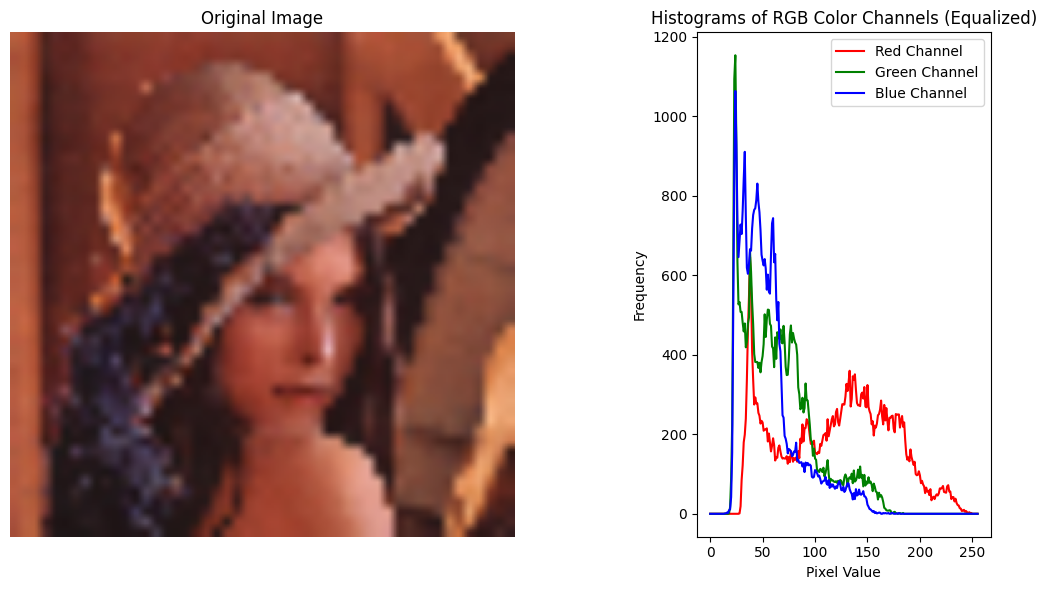

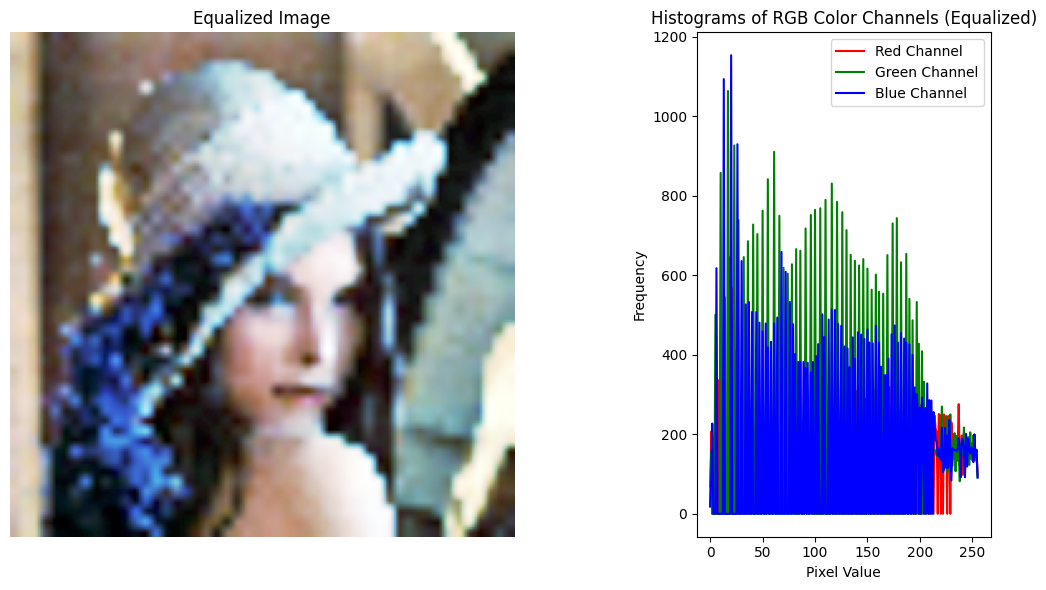

In [4]:
img = cv.resize(img, (200, 200))
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
r, g, b = cv.split(rgb_img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

eq_img = cv.merge((r_eq, g_eq, b_eq))

hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

hist_r_eq = cv.calcHist([r_eq], [0], None, [256], [0, 256])
hist_b_eq = cv.calcHist([g_eq], [0], None, [256], [0, 256])
hist_g_eq = cv.calcHist([b_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
gs1 = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
gs2 = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')

# Plot original image
plt.subplot(gs1[0])
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

# Plot histograms of RGB channels
plt.subplot(gs1[1])
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('Histograms of RGB Color Channels (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


#PLOT AFTER EQUALIZATION 
plt.figure(figsize=(12, 6))
plt.subplot(gs2[1])
plt.plot(hist_r_eq, color='red', label='Red Channel')
plt.plot(hist_g_eq, color='green', label='Green Channel')
plt.plot(hist_b_eq, color='blue', label='Blue Channel')
plt.title('Histograms of RGB Color Channels (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(gs2[0])
plt.imshow(eq_img)
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()



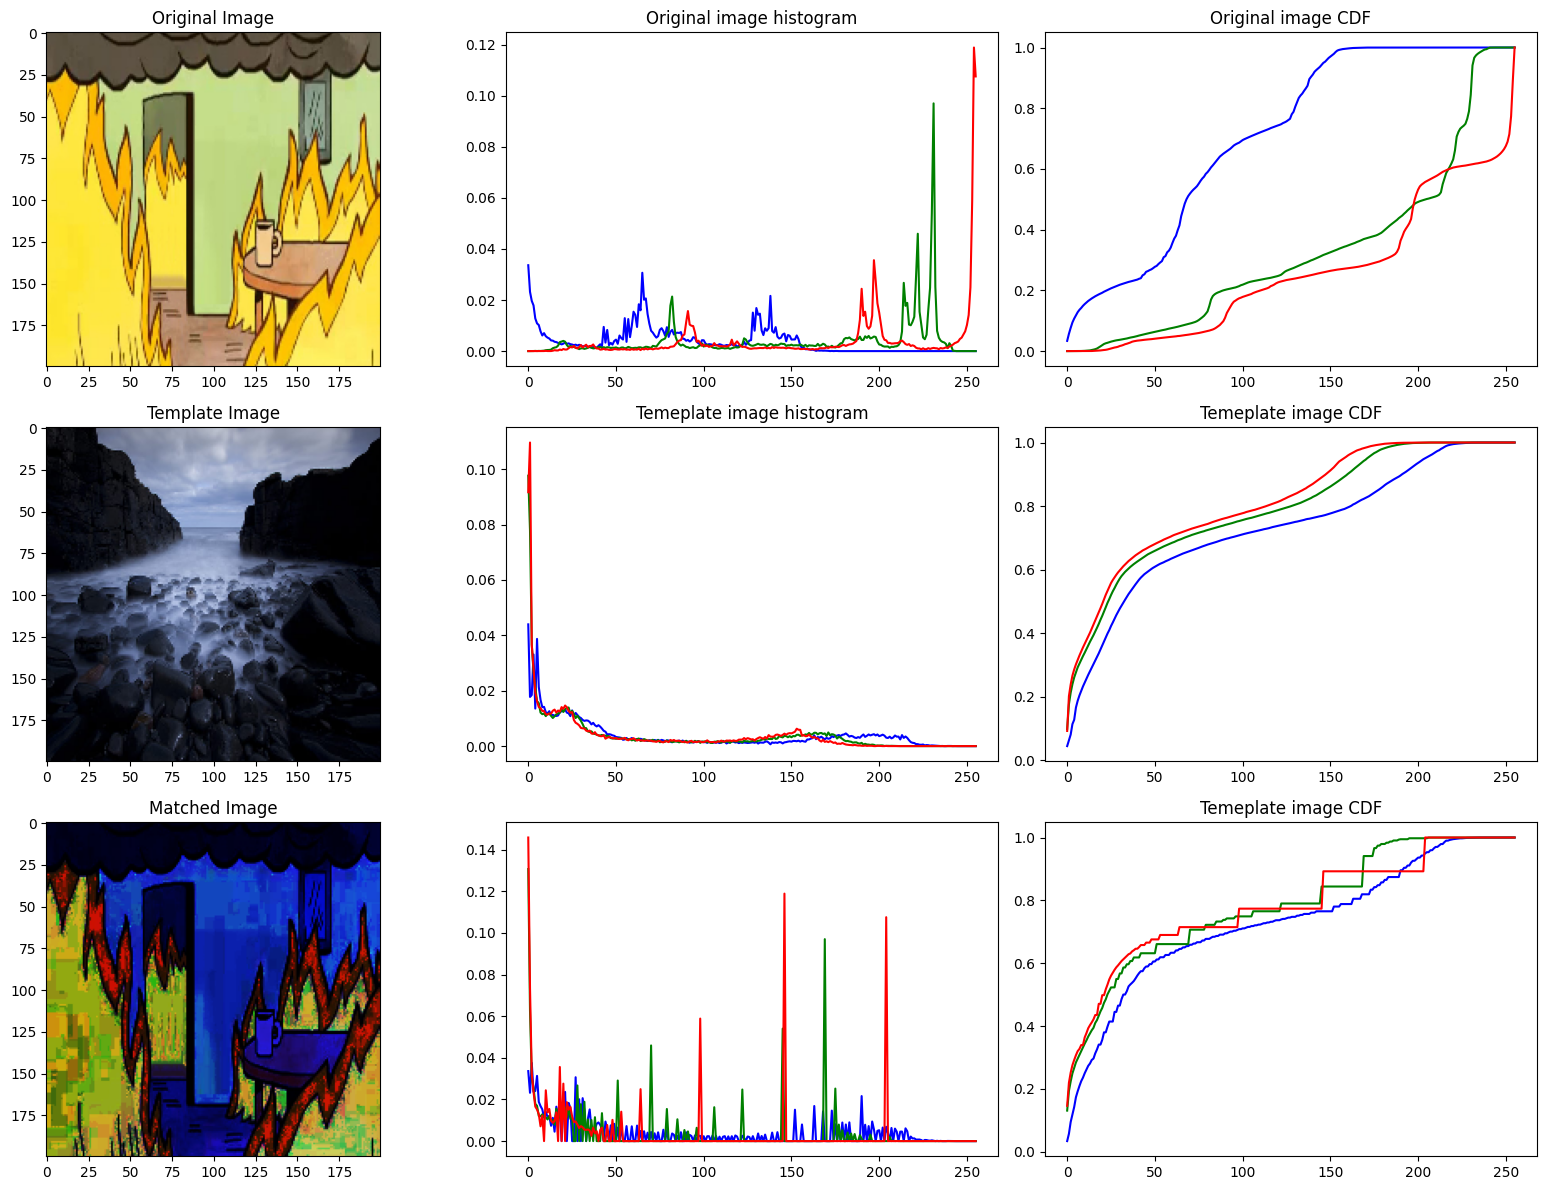

In [32]:
original_img = cv.resize(cv.imread('../PIC/1.jpg'), (200, 200))
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
ori_b = cv.calcHist([original_img], [2], None, [256], [0, 256])/(original_img.shape[0]*original_img.shape[1])
ori_g = cv.calcHist([original_img], [1], None, [256], [0, 256])/(original_img.shape[0]*original_img.shape[1])
ori_r = cv.calcHist([original_img], [0], None, [256], [0, 256])/(original_img.shape[0]*original_img.shape[1])

cdf_red=ori_r.copy()
cdf_green=ori_g.copy()
cdf_blue=ori_b.copy()

for i in range(1,256):
    cdf_red[i]=cdf_red[i]+cdf_red[i-1]
    cdf_green[i]=cdf_green[i]+cdf_green[i-1]
    cdf_blue[i]=cdf_blue[i]+cdf_blue[i-1]


#Template

template_img = cv.resize(cv.imread('../PIC/rock.jpg'), (200, 200))
template_img = cv.cvtColor(template_img, cv.COLOR_BGR2RGB)
tem_hist_b = cv.calcHist([template_img], [2], None, [256], [0, 256])/(template_img.shape[0]*template_img.shape[1])
tem_hist_g = cv.calcHist([template_img], [1], None, [256], [0, 256])/(template_img.shape[0]*template_img.shape[1])
tem_hist_r = cv.calcHist([template_img], [0], None, [256], [0, 256])/(template_img.shape[0]*template_img.shape[1])


cdf_blue_temp = tem_hist_b.copy()
cdf_green_temp = tem_hist_g.copy()
cdf_red_temp = tem_hist_r.copy()

for i in range(1, 256):
    cdf_blue_temp[i]=cdf_blue_temp[i]+cdf_blue_temp[i-1]
    cdf_green_temp[i]=cdf_green_temp[i]+cdf_green_temp[i-1]
    cdf_red_temp[i]=cdf_red_temp[i]+cdf_red_temp[i-1]

 

new_img_r = np.zeros(256)
new_img_g = np.zeros(256)
new_img_b = np.zeros(256)

#manual matching
for i in range(0,256):
    diff = abs(cdf_red[i]-cdf_red_temp)
    new_img_r[i] = np.argmin(diff)
    diff = abs(cdf_green[i]-cdf_green_temp)
    new_img_g[i] = np.argmin(diff)
    diff = abs(cdf_blue[i]-cdf_blue_temp)
    new_img_b[i] = np.argmin(diff)

new_img = np.zeros(original_img.shape)
for i in range(0,original_img.shape[0]):
    for j in range(0,original_img.shape[1]):
        new_img[i,j,0]=new_img_r[original_img[i,j,0]]
        new_img[i,j,1]=new_img_g[original_img[i,j,1]]
        new_img[i,j,2]=new_img_b[original_img[i,j,2]]


new_img= new_img.astype(np.uint8)
new_img_h_r = cv.calcHist([new_img], [0], None, [256], [0, 256])/(new_img.shape[0]*new_img.shape[1])
new_img_h_g = cv.calcHist([new_img], [1], None, [256], [0, 256])/(new_img.shape[0]*new_img.shape[1])
new_img_h_b = cv.calcHist([new_img], [2], None, [256], [0, 256])/(new_img.shape[0]*new_img.shape[1])

cdf_r_new = new_img_h_r.copy()
cdf_g_new = new_img_h_g.copy()
cdf_b_new = new_img_h_b.copy()

for i in range(1,256):
    cdf_r_new[i] = cdf_r_new[i]+cdf_r_new[i-1]
    cdf_g_new[i] = cdf_g_new[i]+cdf_g_new[i-1]    
    cdf_b_new[i] = cdf_b_new[i]+cdf_b_new[i-1]




plt.figure(figsize=(16, 12))

# Plot original, template, and matched images
plt.subplot(3, 3, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.subplot(3, 3, 2)
plt.plot(ori_b, 'b')
plt.plot(ori_g, 'g')
plt.plot(ori_r, 'r')
plt.title("Original image histogram")
plt.subplot(3, 3, 3)
plt.plot(cdf_blue, 'b')
plt.plot(cdf_green, 'g')
plt.plot(cdf_red, 'r')
plt.title("Original image CDF")



plt.subplot(3, 3, 4)
plt.imshow(template_img)
plt.title("Template Image")
plt.subplot(3, 3, 5)
plt.plot(tem_hist_b, 'b')
plt.plot(tem_hist_g, 'g')
plt.plot(tem_hist_r, 'r')
plt.title("Temeplate image histogram")
plt.subplot(3, 3, 6)
plt.plot(cdf_blue_temp, 'b')
plt.plot(cdf_green_temp, 'g')
plt.plot(cdf_red_temp, 'r')
plt.title("Temeplate image CDF")

plt.subplot(3, 3, 7)
plt.imshow(new_img)
plt.title("Matched Image")
plt.subplot(3, 3, 8)
plt.plot(new_img_h_b, 'b')
plt.plot(new_img_h_g, 'g')
plt.plot(new_img_h_r, 'r')
plt.subplot(3, 3, 9)
plt.plot(cdf_b_new, 'b')
plt.plot(cdf_g_new, 'g')
plt.plot(cdf_r_new, 'r')
plt.title("Temeplate image CDF")

plt.tight_layout()
plt.show()